Average Silhouette Score for K-Means: 0.13710381783250677
Silhouette Scores:
Clusters=2, Silhouette Score=0.18579668722381615
Clusters=3, Silhouette Score=0.14901268740600798
Clusters=4, Silhouette Score=0.14055949421122468
Clusters=5, Silhouette Score=0.13113543247985504
Clusters=6, Silhouette Score=0.1344368355597464
Clusters=7, Silhouette Score=0.12971301717851091
Clusters=8, Silhouette Score=0.12322475980842035
Clusters=9, Silhouette Score=0.12146168655169844
Clusters=10, Silhouette Score=0.11859376007328085


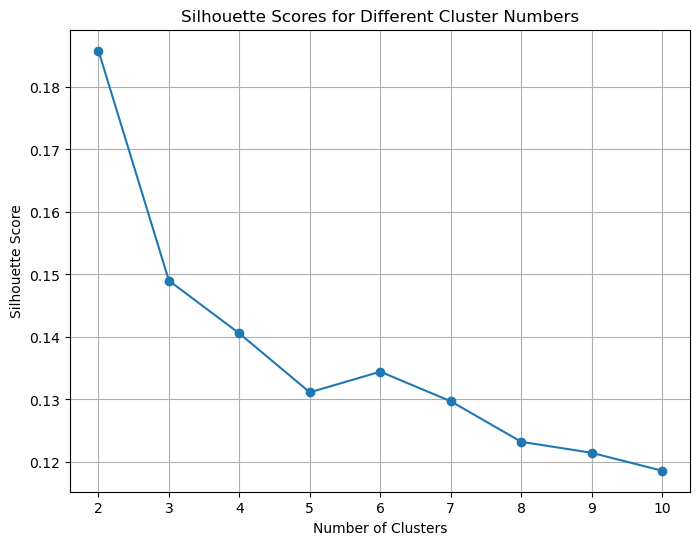

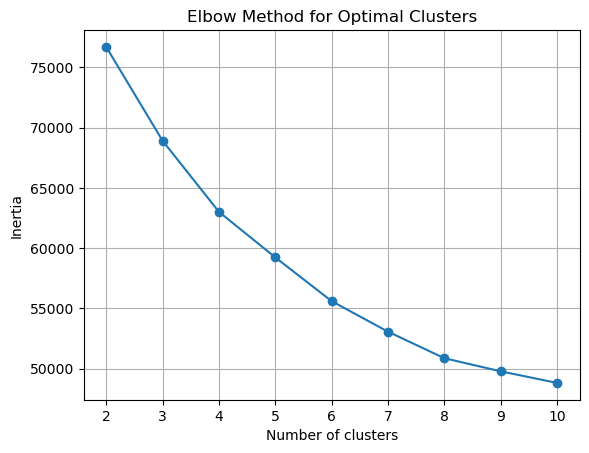

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the Nursery Dataset
nursery_data = pd.read_csv("C:/Users/budal/Downloads/nursery/nursery.data", header=None)

# Define the column names
nursery_data.columns = [
    'parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class_recommend'
]

# Encode categorical features
label_encoders = {}
categorical_columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class_recommend']

for column in categorical_columns:
    le = LabelEncoder()
    nursery_data[column] = le.fit_transform(nursery_data[column])
    label_encoders[column] = le

# Drop the target column
nursery_data_encoded = nursery_data.drop(columns=['class_recommend'])

# Create a list to store the silhouette scores for different cluster numbers
silhouette_scores = []

# Determine the range of cluster numbers to try
cluster_range = range(2, 11)  # You can adjust this range as needed

for n_clusters in cluster_range:
    # Create and fit the KMeans model with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    nursery_clusters_kmeans = kmeans.fit_predict(nursery_data_encoded)

    # Calculate the silhouette score for the current clustering
    silhouette_avg = silhouette_score(nursery_data_encoded, nursery_clusters_kmeans)
    silhouette_scores.append(silhouette_avg)

# Calculate the average Silhouette Score
average_silhouette_score = np.mean(silhouette_scores)

print(f"Average Silhouette Score for K-Means: {average_silhouette_score}")

# Print the silhouette scores for different cluster numbers
print("Silhouette Scores:")
for i, score in enumerate(silhouette_scores):
    print(f"Clusters={i + 2}, Silhouette Score={score}")

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Cluster Numbers')
plt.grid()
plt.show()

# Perform the elbow method to find the optimal number of clusters
inertia = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(nursery_data_encoded)
    inertia.append(kmeans.inertia_)

# Plot the elbow method results
plt.figure()
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.grid()
plt.show()


C:\Users\budal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\budal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\budal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\budal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

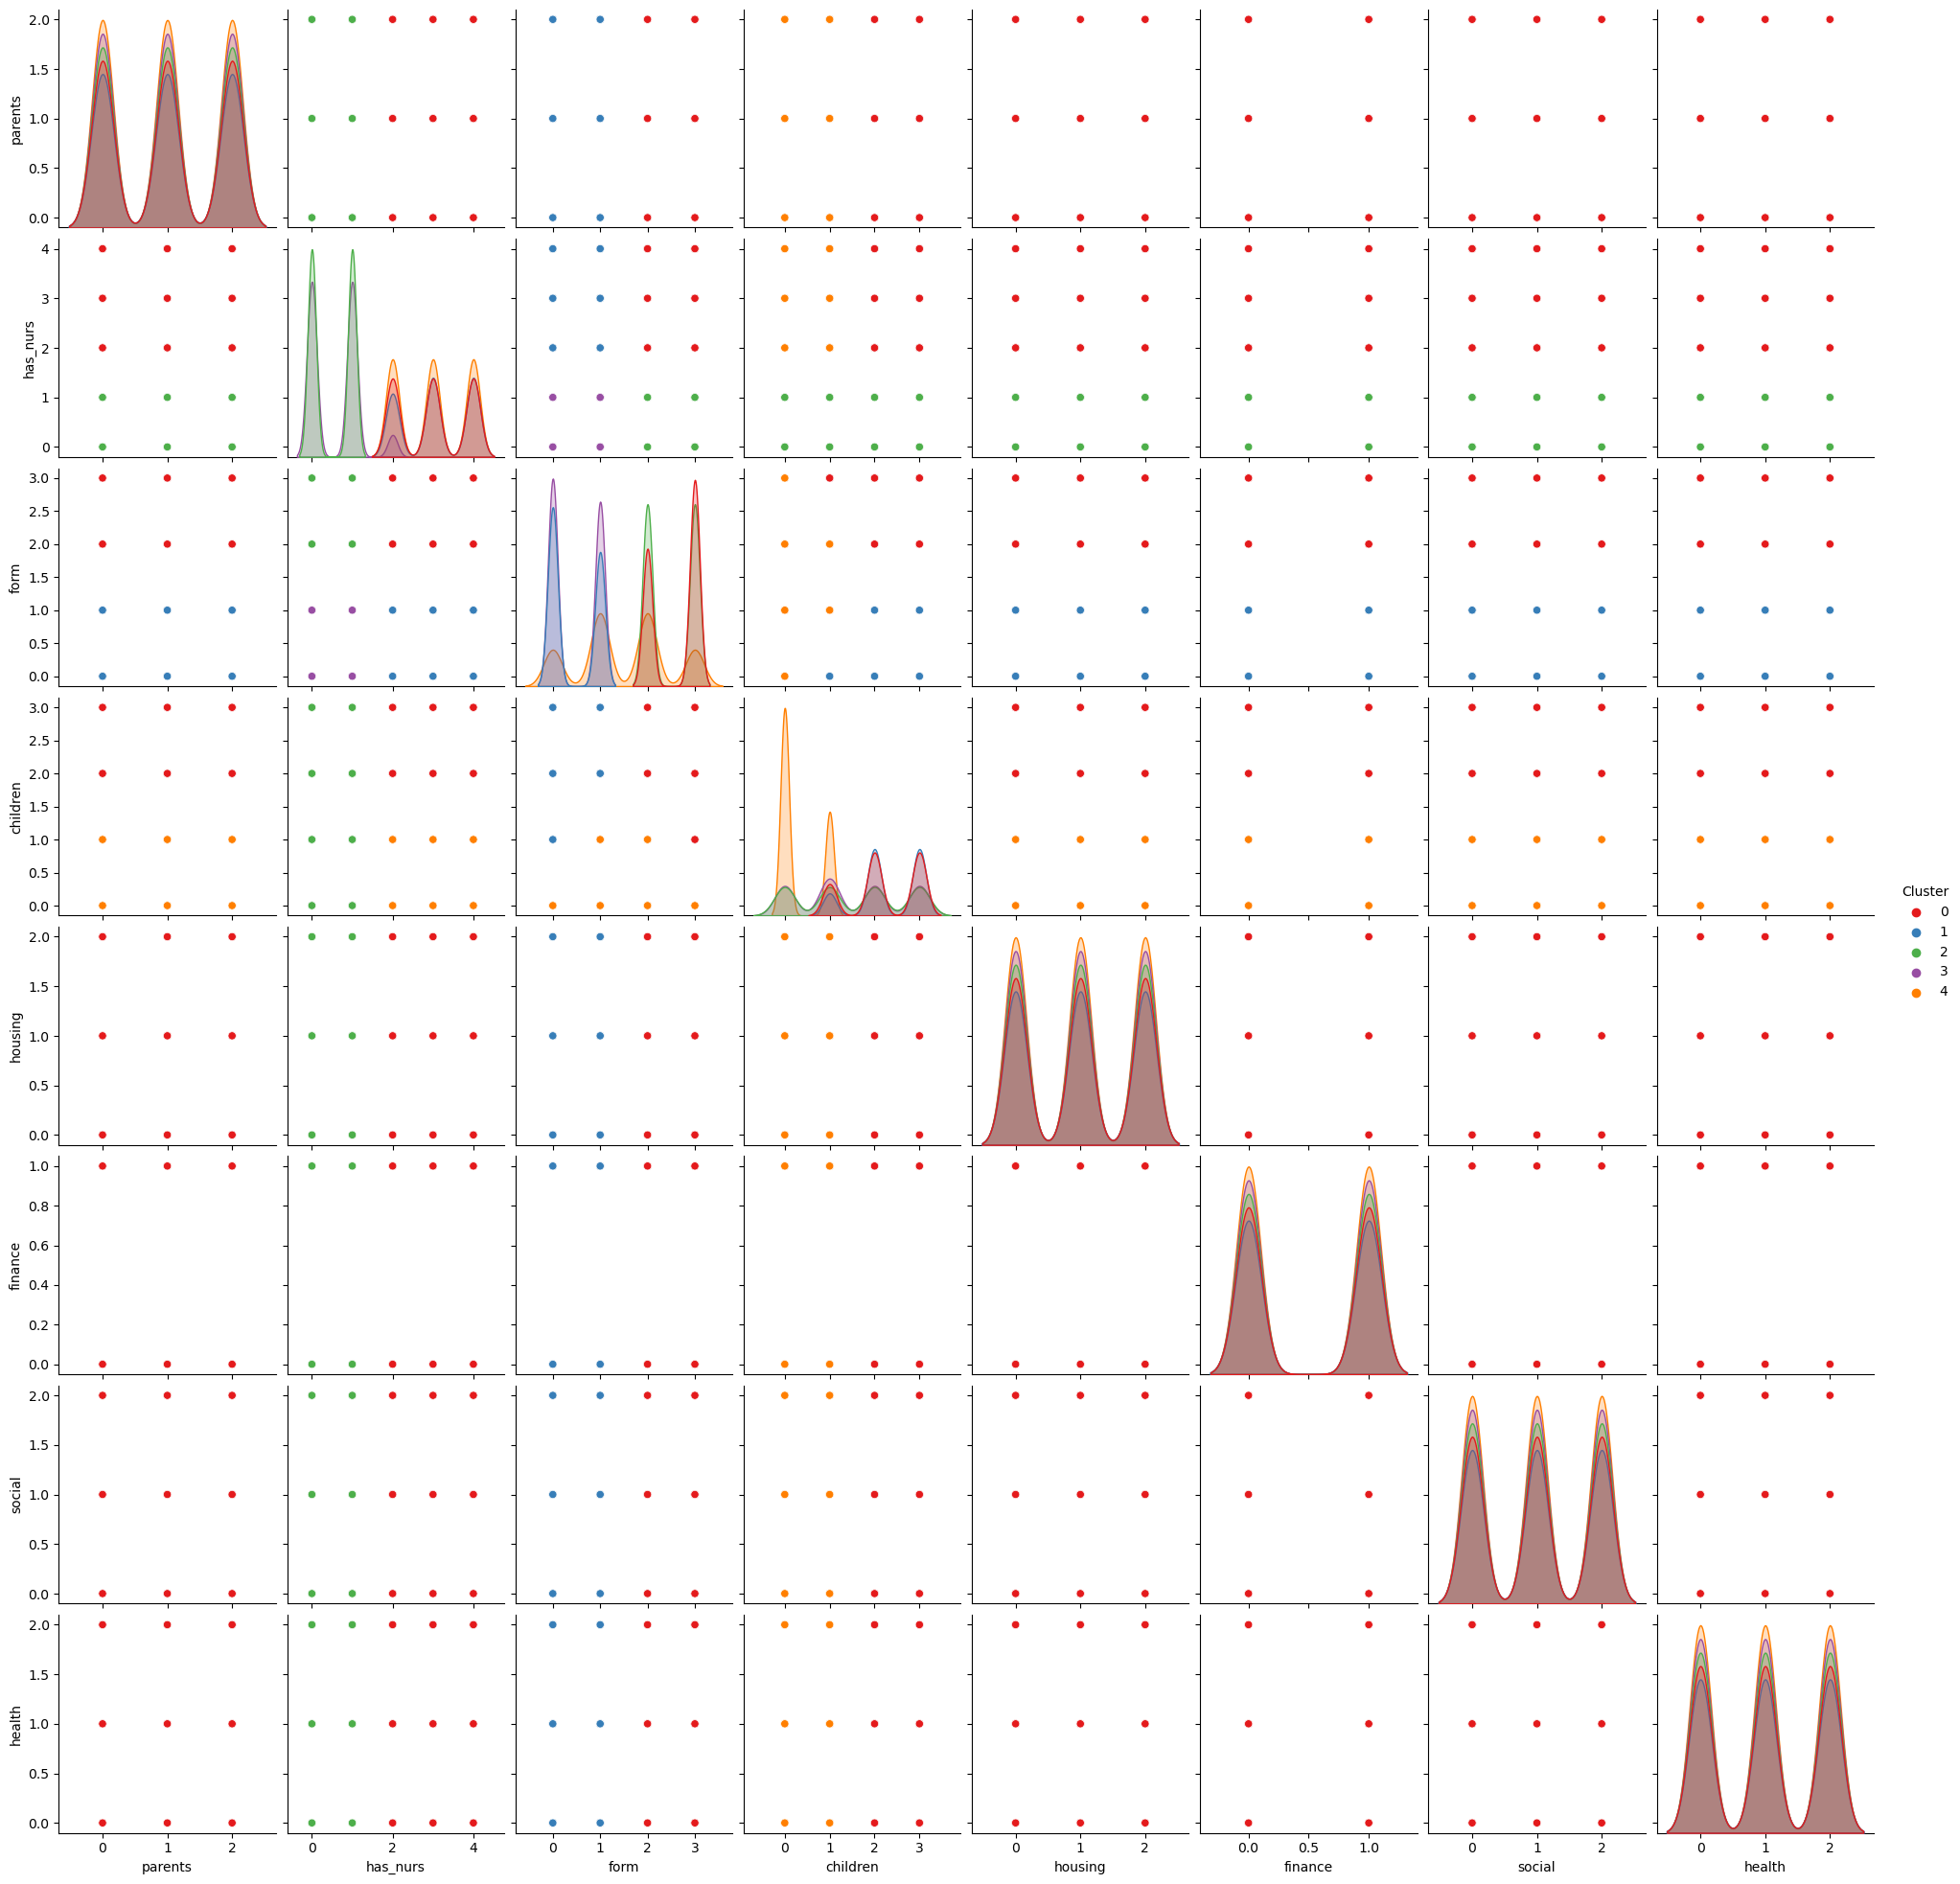

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Nursery Dataset
nursery_data = pd.read_csv("C:/Users/budal/Downloads/nursery/nursery.data", header=None)

# Define the column names
nursery_data.columns = [
    'parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class_recommend'
]

# Encode categorical features
label_encoders = {}
categorical_columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class_recommend']

for column in categorical_columns:
    le = LabelEncoder()
    nursery_data[column] = le.fit_transform(nursery_data[column])
    label_encoders[column] = le

# Drop the target column
nursery_data_encoded = nursery_data.drop(columns=['class_recommend'])

# Determine the optimal number of clusters
optimal_clusters = 5  # You can change this to your desired number of clusters

# Create and fit the KMeans model with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
nursery_clusters_kmeans = kmeans.fit_predict(nursery_data_encoded)

# Convert the cluster labels to a Pandas Series
cluster_series = pd.Series(nursery_clusters_kmeans, name="Cluster")

# Visualize KMeans clustering using a pair plot
nursery_data_plot = pd.concat([nursery_data_encoded, cluster_series], axis=1)
sns.pairplot(nursery_data_plot, hue="Cluster", palette="Set1")
plt.show()

In [41]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder

# Load the Nursery Dataset
nursery_data = pd.read_csv("C:/Users/budal/Downloads/nursery/nursery.data", header=None)

# Define the column names
nursery_data.columns = [
    'parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class_recommend'
]

# Encode categorical features
label_encoders = {}
categorical_columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class_recommend']

for column in categorical_columns:
    le = LabelEncoder()
    nursery_data[column] = le.fit_transform(nursery_data[column])
    label_encoders[column] = le

# Drop the target column
nursery_data_encoded = nursery_data.drop(columns=['class_recommend'])

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust 'eps' and 'min_samples' as needed
nursery_clusters_dbscan = dbscan.fit_predict(nursery_data_encoded)

# The cluster labels are stored in 'nursery_clusters_dbscan'

# Analyze the results, e.g., the number of clusters, noise points, etc.
num_clusters = len(set(nursery_clusters_dbscan)) - (1 if -1 in nursery_clusters_dbscan else 0)  # Number of clusters (-1 represents noise)
num_noise_points = list(nursery_clusters_dbscan).count(-1)  # Number of noise points

print(f'Number of clusters: {num_clusters}')
print(f'Number of noise points: {num_noise_points}')


Number of clusters: 0
Number of noise points: 12960


In [30]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust 'eps' and 'min_samples' as needed
nursery_clusters = dbscan.fit_predict(nursery_data_encoded)

# Check if there's only one cluster (e.g., -1 represents noise)
if len(set(nursery_clusters)) == 1:
    print("DBSCAN resulted in only one cluster (e.g., noise). CHI and DBI not applicable.")
else:
    # Calculate CHI (Calinski-Harabasz Index) and DBI (Davies-Bouldin Index) scores
    chi_score = calinski_harabasz_score(nursery_data_encoded, nursery_clusters)
    dbi_score = davies_bouldin_score(nursery_data_encoded, nursery_clusters)

    print(f"CHI Score: {chi_score}")
    print(f"DBI Score: {dbi_score}")


DBSCAN resulted in only one cluster (e.g., noise). CHI and DBI not applicable.


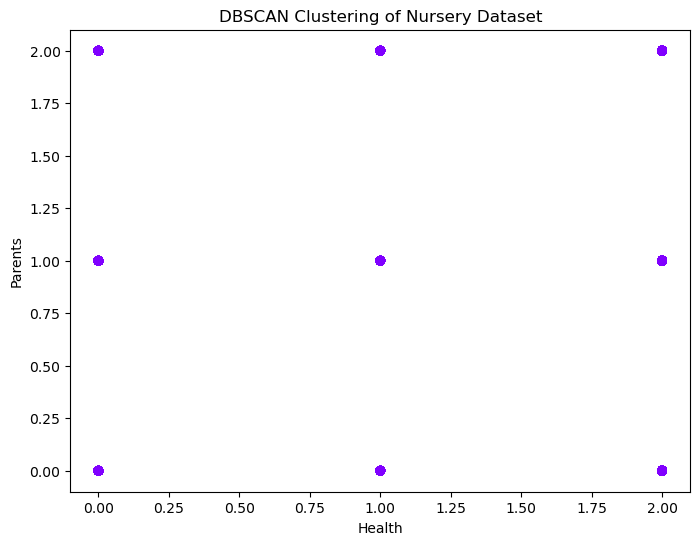

In [31]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the Nursery Dataset
nursery_data = pd.read_csv("C:/Users/budal/Downloads/nursery/nursery.data", header=None)

# Define the column names
nursery_data.columns = [
    'parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class_recommend'
]

# Encode categorical features
label_encoders = {}
categorical_columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class_recommend']

for column in categorical_columns:
    le = LabelEncoder()
    nursery_data[column] = le.fit_transform(nursery_data[column])
    label_encoders[column] = le

# Drop the target column
nursery_data_encoded = nursery_data.drop(columns=['class_recommend'])

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust 'eps' and 'min_samples' as needed
nursery_clusters = dbscan.fit_predict(nursery_data_encoded)

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Create a scatter plot of the clusters
plt.scatter(nursery_data_encoded['health'], nursery_data_encoded['parents'], c=nursery_clusters, cmap='rainbow')
plt.title('DBSCAN Clustering of Nursery Dataset')
plt.xlabel('Health')
plt.ylabel('Parents')
plt.show()


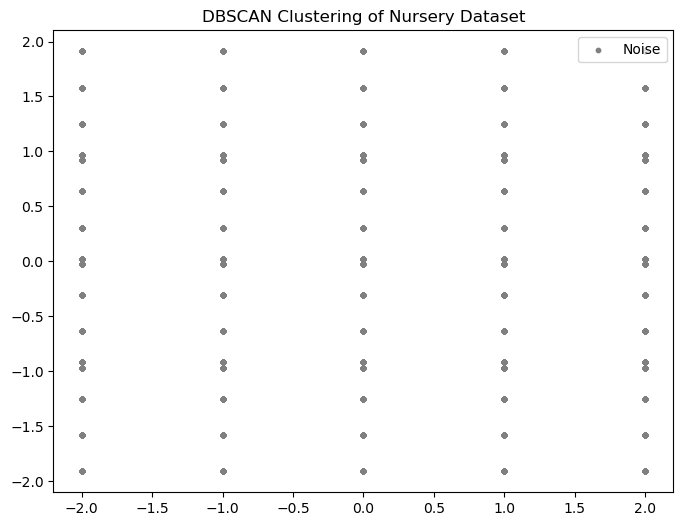

In [42]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Nursery Dataset
nursery_data = pd.read_csv("C:/Users/budal/Downloads/nursery/nursery.data", header=None)

# Define the column names
nursery_data.columns = [
    'parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class_recommend'
]

# Encode categorical features
label_encoders = {}
categorical_columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class_recommend']

for column in categorical_columns:
    le = LabelEncoder()
    nursery_data[column] = le.fit_transform(nursery_data[column])
    label_encoders[column] = le

# Drop the target column
nursery_data_encoded = nursery_data.drop(columns=['class_recommend'])

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust 'eps' and 'min_samples' as needed
nursery_clusters_dbscan = dbscan.fit_predict(nursery_data_encoded)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2D
nursery_data_reduced = pca.fit_transform(nursery_data_encoded)

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))

# Plot the points with different cluster labels
for cluster_label in set(nursery_clusters_dbscan):
    if cluster_label == -1:
        # Noise points
        plt.scatter(nursery_data_reduced[nursery_clusters_dbscan == cluster_label][:, 0],
                    nursery_data_reduced[nursery_clusters_dbscan == cluster_label][:, 1],
                    label=f'Noise', s=10, c='gray')
    else:
        # Regular clusters
        plt.scatter(nursery_data_reduced[nursery_clusters_dbscan == cluster_label][:, 0],
                    nursery_data_reduced[nursery_clusters_dbscan == cluster_label][:, 1],
                    label=f'Cluster {cluster_label}')

plt.title('DBSCAN Clustering of Nursery Dataset')
plt.legend()
plt.show()


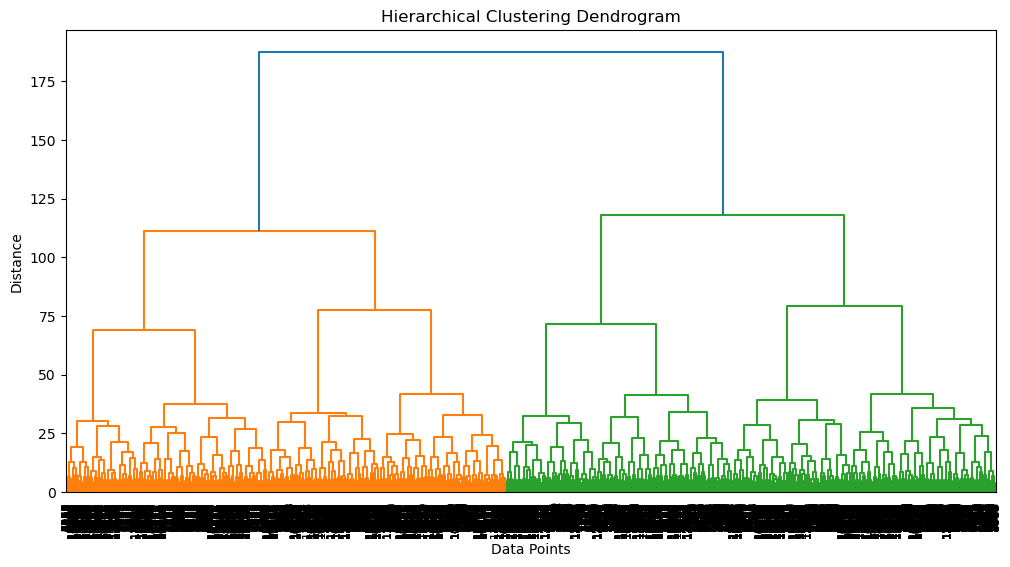

Cluster Assignments:
Data Point 0: Cluster 5
Data Point 1: Cluster 5
Data Point 2: Cluster 5
Data Point 3: Cluster 5
Data Point 4: Cluster 5
Data Point 5: Cluster 5
Data Point 6: Cluster 5
Data Point 7: Cluster 5
Data Point 8: Cluster 5
Data Point 9: Cluster 5
Data Point 10: Cluster 5
Data Point 11: Cluster 5
Data Point 12: Cluster 5
Data Point 13: Cluster 5
Data Point 14: Cluster 5
Data Point 15: Cluster 5
Data Point 16: Cluster 5
Data Point 17: Cluster 5
Data Point 18: Cluster 5
Data Point 19: Cluster 5
Data Point 20: Cluster 5
Data Point 21: Cluster 5
Data Point 22: Cluster 5
Data Point 23: Cluster 5
Data Point 24: Cluster 5
Data Point 25: Cluster 5
Data Point 26: Cluster 5
Data Point 27: Cluster 5
Data Point 28: Cluster 5
Data Point 29: Cluster 5
Data Point 30: Cluster 5
Data Point 31: Cluster 5
Data Point 32: Cluster 5
Data Point 33: Cluster 5
Data Point 34: Cluster 5
Data Point 35: Cluster 5
Data Point 36: Cluster 5
Data Point 37: Cluster 5
Data Point 38: Cluster 5
Data Point 39:

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import LabelEncoder

# Load the Nursery Dataset
nursery_data = pd.read_csv("C:/Users/budal/Downloads/nursery/nursery.data", header=None)

# Define the column names
nursery_data.columns = [
    'parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class_recommend'
]

# Encode categorical features
label_encoders = {}
categorical_columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class_recommend']

for column in categorical_columns:
    le = LabelEncoder()
    nursery_data[column] = le.fit_transform(nursery_data[column])
    label_encoders[column] = le

# Drop the target column
nursery_data_encoded = nursery_data.drop(columns=['class_recommend'])

# Calculate the linkage matrix using Ward's method (you can choose a different method)
linkage_matrix = linkage(nursery_data_encoded, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=nursery_data.index, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Set the threshold to cut the dendrogram into clusters (you can adjust this threshold)
threshold = 50  # Adjust as needed

# Perform clustering based on the threshold
clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')

# Print the cluster assignments for each data point
print("Cluster Assignments:")
for data_point, cluster in zip(nursery_data.index, clusters):
    print(f"Data Point {data_point}: Cluster {cluster}")

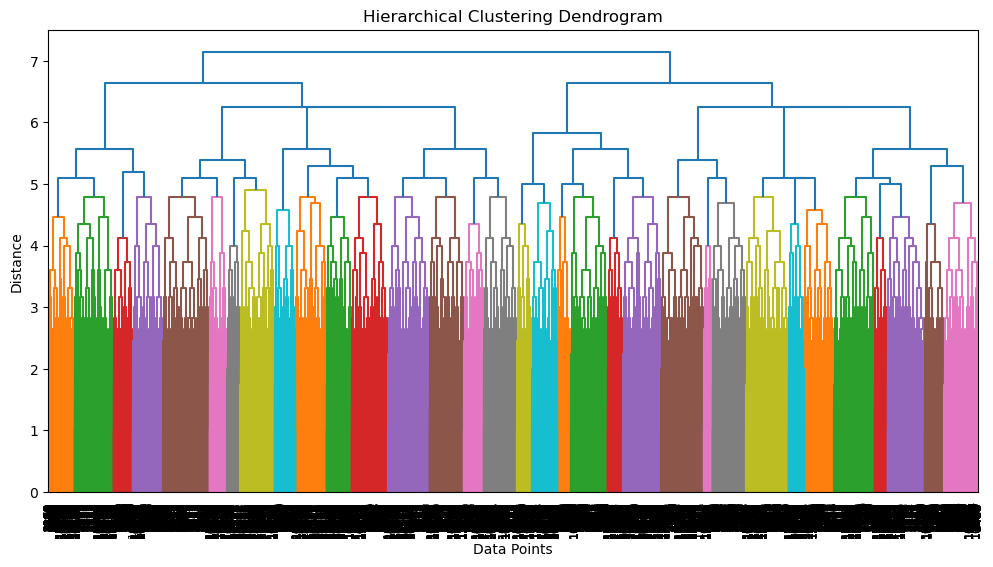

Cluster Assignments:
Data Point 0: Cluster 1
Data Point 1: Cluster 1
Data Point 2: Cluster 1
Data Point 3: Cluster 1
Data Point 4: Cluster 1
Data Point 5: Cluster 1
Data Point 6: Cluster 1
Data Point 7: Cluster 1
Data Point 8: Cluster 1
Data Point 9: Cluster 1
Data Point 10: Cluster 1
Data Point 11: Cluster 1
Data Point 12: Cluster 1
Data Point 13: Cluster 1
Data Point 14: Cluster 1
Data Point 15: Cluster 1
Data Point 16: Cluster 1
Data Point 17: Cluster 1
Data Point 18: Cluster 1
Data Point 19: Cluster 1
Data Point 20: Cluster 1
Data Point 21: Cluster 1
Data Point 22: Cluster 1
Data Point 23: Cluster 1
Data Point 24: Cluster 1
Data Point 25: Cluster 1
Data Point 26: Cluster 1
Data Point 27: Cluster 1
Data Point 28: Cluster 1
Data Point 29: Cluster 1
Data Point 30: Cluster 1
Data Point 31: Cluster 1
Data Point 32: Cluster 1
Data Point 33: Cluster 1
Data Point 34: Cluster 1
Data Point 35: Cluster 1
Data Point 36: Cluster 1
Data Point 37: Cluster 1
Data Point 38: Cluster 1
Data Point 39:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import LabelEncoder

# Load the Nursery Dataset
nursery_data = pd.read_csv("C:/Users/budal/Downloads/nursery/nursery.data", header=None)

# Define the column names
nursery_data.columns = [
    'parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class_recommend'
]

# Encode categorical features
label_encoders = {}
categorical_columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class_recommend']

for column in categorical_columns:
    le = LabelEncoder()
    nursery_data[column] = le.fit_transform(nursery_data[column])
    label_encoders[column] = le

# Drop the target column
nursery_data_encoded = nursery_data.drop(columns=['class_recommend'])

# Calculate the linkage matrix using a different method (e.g., complete or average)
linkage_matrix = linkage(nursery_data_encoded, method='complete')  # You can change the linkage method

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=nursery_data.index, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Set a higher threshold to cut the dendrogram into clusters (you can adjust this threshold)
threshold = 100  # Adjust as needed

# Perform clustering based on the higher threshold
clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')

# Print the cluster assignments for each data point
print("Cluster Assignments:")
for data_point, cluster in zip(nursery_data.index, clusters):
    print(f"Data Point {data_point}: Cluster {cluster}")
